In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv(r'C:\Users\ADMIN\Data_Science\Titanic\train.csv')
test = pd.read_csv(r'C:\Users\ADMIN\Data_Science\Titanic\test.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
X = titanic.drop(['PassengerId','Ticket'], axis = 1)
y = titanic['Survived']

In [6]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
X.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
X.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
X['Pclass']=X['Pclass'].astype('category')

Name

In [11]:
df_name = X.copy()

In [12]:
name_lst = []
for i in df_name['Name']:  
    a = i.split(', ')[1].split('.')[0]
    name_lst.append(a)
df=pd.DataFrame({'title':name_lst})
df.value_counts()

title       
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
dtype: int64

In [13]:
def group_name(title):
    if title == 'Mr':
        return title
    elif title in ['Mrs','Mme','Lady']:
        return 'Mrs'
    elif title in ['Miss','Ms','Mlle']:
        return 'Miss'
    elif title == 'Master':
        return title
    else: 
        return 'Rare'
def title(name):
    title = name.split(', ')[1].split('.')[0]
    return title
X['Name'] = X['Name'].apply(title)
X['Name'] = X['Name'].apply(group_name)
test['Name'] = test['Name'].apply(title)
test['Name'] = test['Name'].apply(group_name)

In [14]:
lst_map = {'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Rare':4}
X['Name'] = X['Name'].map(lst_map)
test['Name'] =test['Name'].map(lst_map)

In [15]:
X['Name'] = X['Name'].astype('category')
test['Name'] = test['Name'].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     204 non-null    object  
 9   Embarked  889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 57.9+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    category
 3   Sex          418 non-null    object  
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 33.4+ KB


<AxesSubplot:xlabel='Name', ylabel='count'>

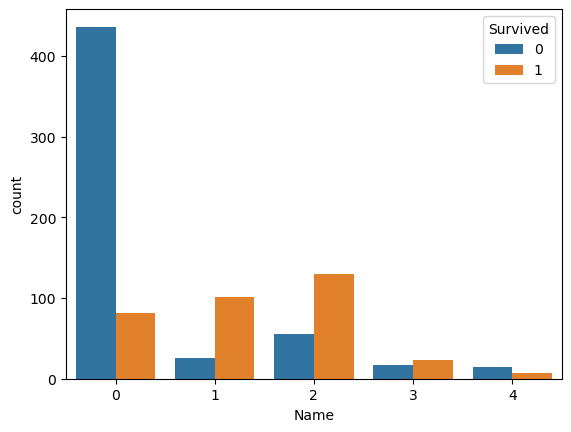

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data = X, x = 'Name', hue = 'Survived')

Sex

In [18]:
df_sex = X.copy()
df_sex.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,male,22.0,1,0,7.2500,NaN,S
1,1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,2,female,26.0,0,0,7.9250,NaN,S
3,1,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,0,male,35.0,0,0,8.0500,NaN,S


In [19]:
sex_map = {'male':0,'female':1}
X['Sex'] = X['Sex'].map(sex_map)
X['Sex'] = X['Sex'].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     204 non-null    object  
 9   Embarked  889 non-null    object  
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 51.9+ KB


In [20]:
test['Sex'] = test['Sex'].map(sex_map)
test['Sex'] = test['Sex'].astype('category')


In [21]:
test['Pclass'] = test['Pclass'].astype('category')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 27.9+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

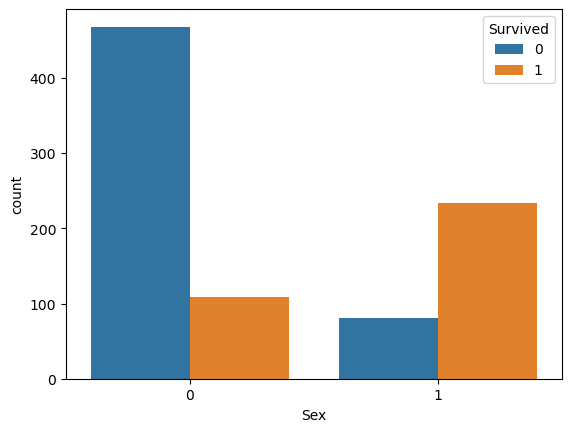

In [22]:
sns.countplot(data = X, x = 'Sex', hue = 'Survived')

Cabin

In [23]:
df_cabin = X.copy()
df_cabin.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,2,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,0,35.0,0,0,8.0500,NaN,S


In [24]:
df_cabin['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
cabin_lst = []
for i in X['Cabin']:
    a = str(i)[0]
    cabin_lst.append(a)
df = pd.DataFrame({'cabin':cabin_lst})
df.cabin.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64

In [26]:
def cabin(cabin):
    a = str(cabin)[0]
    return a
X['Cabin'] = X['Cabin'].apply(cabin)

In [27]:
def group_cabin(cabin):
    if cabin in ['A','B','C']:
        return 'ABC'
    elif cabin in ['D','E']:
        return 'DE'
    elif cabin in ['F','G','T']:
        return 'FGT'
    else:
        return 'N'
cabin_map = {'ABC':0,'DE':1,'FGT':2,'N':3}

X['Cabin'] = X['Cabin'].apply(group_cabin)
X['Cabin'] = X['Cabin'].map(cabin_map)

test['Cabin'] = test['Cabin'].apply(cabin)
test['Cabin'] = test['Cabin'].apply(group_cabin)
test['Cabin'] = test['Cabin'].map(cabin_map)

In [28]:
X['Cabin'] = X['Cabin'].astype('category')
test['Cabin'] = test['Cabin'].astype('category')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

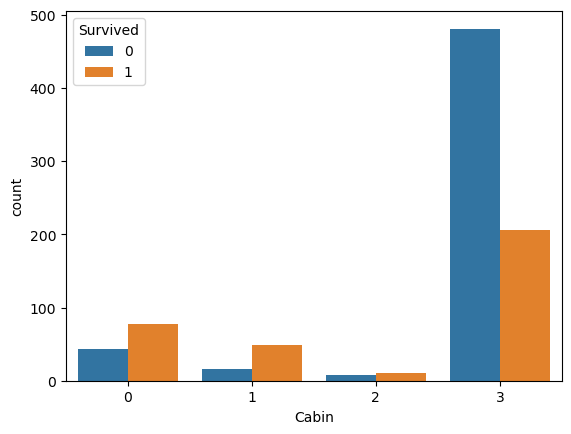

In [29]:
sns.countplot(data = X, x ='Cabin', hue = 'Survived')

In [30]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,0,22.0,1,0,7.2500,3,S
1,1,1,1,1,38.0,1,0,71.2833,0,C
2,1,3,2,1,26.0,0,0,7.9250,3,S
3,1,1,1,1,35.0,1,0,53.1000,0,S
4,0,3,0,0,35.0,0,0,8.0500,3,S


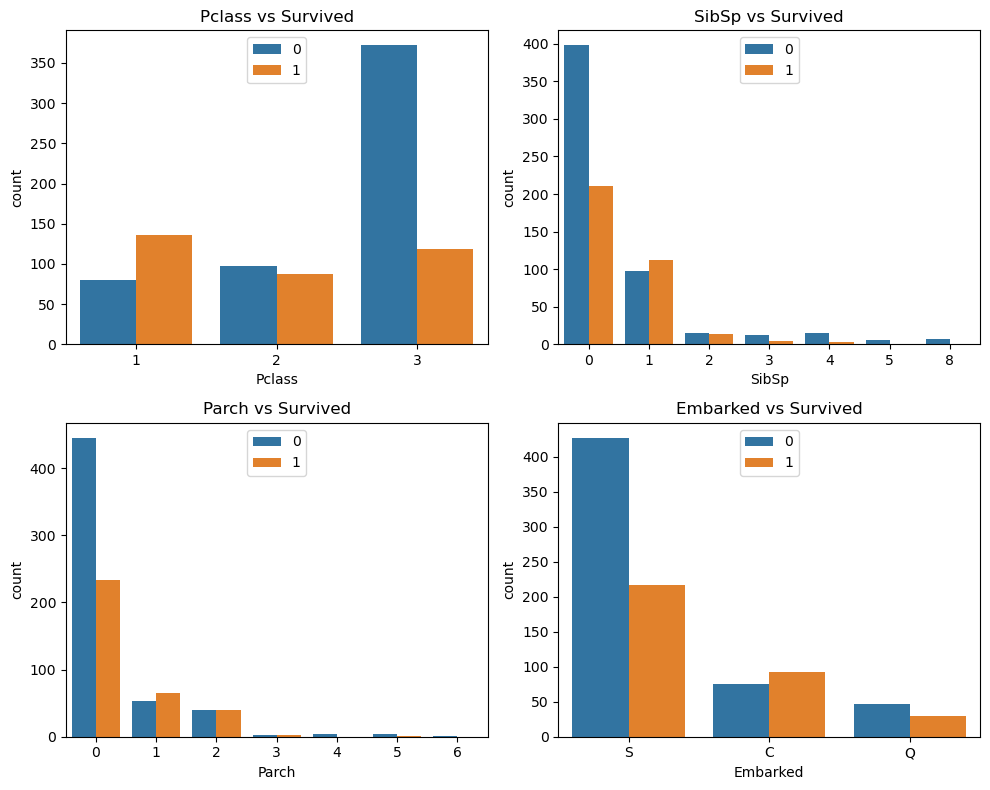

In [31]:
nrow = 2
ncol = 2
lst = ['Pclass','SibSp','Parch','Embarked']
fig, ax = plt.subplots(nrow, ncol, figsize = (5*ncol,4*nrow))
for i in range (nrow):
    for j in range (ncol):
        k = i*ncol + j
        ax_k = ax[i,j]
        sns.countplot(data = X, x = lst[k], ax = ax_k, hue='Survived')
        ax_k.set_title(f'{lst[k]} vs Survived')
        ax_k.legend(loc = 'upper center')
plt.tight_layout()

SibSp + Parch

<AxesSubplot:xlabel='Family', ylabel='count'>

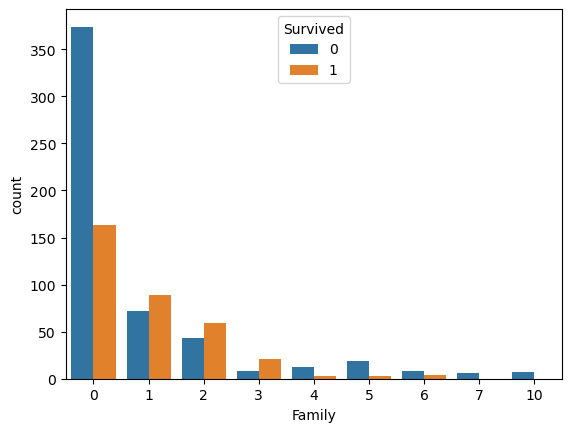

In [32]:
X['Family'] = X['SibSp'] + X['Parch']
sns.countplot(data = X, x = 'Family', hue = 'Survived')

In [33]:
X['Family_cat']=pd.cut(X['Family'], (0,1,4,12), labels = (0,1,2), right = False)

In [34]:
test['Family'] = test['SibSp'] + test['Parch']
test['Family_cat']=pd.cut(test['Family'], (0,1,4,12), labels = (0,1,2), right = False)

Age

In [35]:
mean_age = X.groupby(['Sex','Pclass'])['Age']
X['Age'] = mean_age.apply(lambda x: x.fillna(x.median()))

In [36]:
test['Age'] = mean_age.apply(lambda x: x.fillna(x.median()))

<AxesSubplot:xlabel='Age', ylabel='Count'>

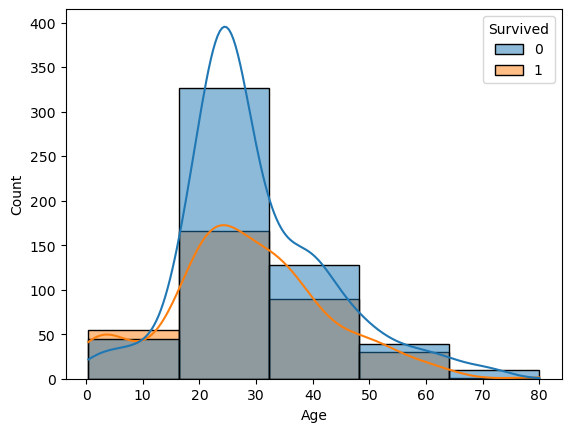

In [37]:
sns.histplot(data = X, x = 'Age', bins= 5, hue='Survived', kde = True)

In [38]:
X['Age_group'] = pd.cut(X['Age'],(0,16,32,48,64,81), labels = (0,1,2,3,4), right = False)
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Family_cat,Age_group
0,0,3,0,0,22.0,1,0,7.2500,3,S,1,1,1
1,1,1,1,1,38.0,1,0,71.2833,0,C,1,1,2
2,1,3,2,1,26.0,0,0,7.9250,3,S,0,0,1
3,1,1,1,1,35.0,1,0,53.1000,0,S,1,1,2
4,0,3,0,0,35.0,0,0,8.0500,3,S,0,0,2


<AxesSubplot:xlabel='Age_group', ylabel='count'>

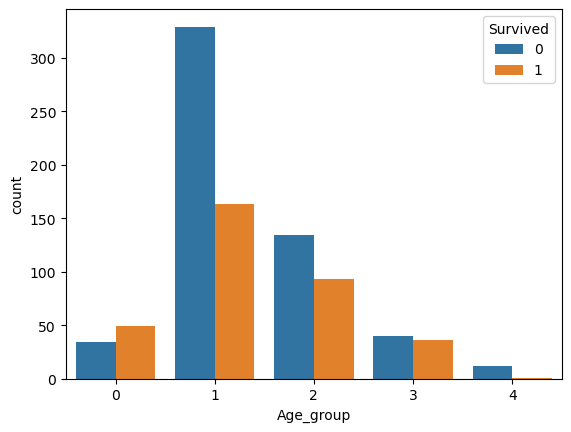

In [39]:
sns.countplot(data = X, x = 'Age_group', hue = 'Survived')

In [40]:
test['Age_group'] = pd.cut(test['Age'],(0,16,32,48,64,80), labels = (0,1,2,3,4), right = False)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        418 non-null    category
 10  Embarked     418 non-null    object  
 11  Family       418 non-null    int64   
 12  Family_cat   418 non-null    category
 13  Age_group    418 non-null    category
dtypes: category(6), float64(2), int64(4), object(2)
memory usage: 29.7+ KB


In [41]:
X['Age_group']=X['Age_group'].astype(int)

In [42]:
test['Age_group']=X['Age_group'].astype(int)

Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

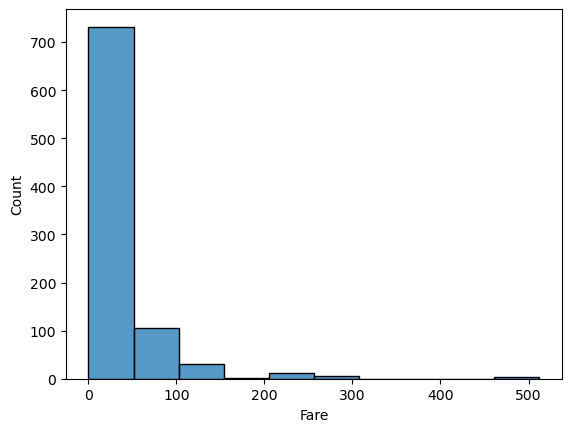

In [43]:
sns.histplot(data = X, x = 'Fare', bins = 10)

<AxesSubplot:xlabel='Fare_group', ylabel='count'>

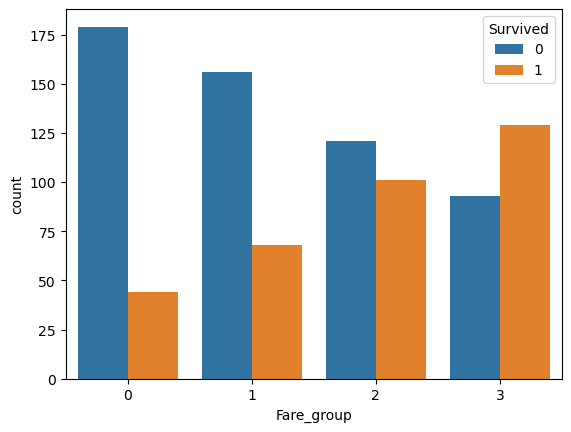

In [44]:
X['Fare_group'] = pd.qcut(X['Fare'], q = 4,labels = (0,1,2,3))
X['Fare_group'] = X['Fare_group'].astype(int)
sns.countplot(data = X, x='Fare_group',hue = 'Survived')

In [45]:
from sklearn.impute import SimpleImputer
test['Fare'] = SimpleImputer(strategy='mean').fit_transform(test[['Fare']])


In [46]:
test['Fare_group'] = pd.qcut(test['Fare'], q = 4,labels = (0,1,2,3))
test['Fare_group'] = test['Fare_group'].astype(int)

Embarked

In [47]:
X['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(X[['Embarked']])

In [48]:
em_map = {'S':0,'C':1,'Q':2}
X['Embarked'] = X['Embarked'].map(em_map)

In [49]:
X['Embarked'] = X['Embarked'].astype('category')

In [50]:
test['Embarked'] = test['Embarked'].map(em_map)
test['Embarked'] = test['Embarked'].astype('category')

In [51]:
X = X.drop(['Age','SibSp','Parch','Fare','Family'], axis = 1)
y = X.pop('Survived')

In [52]:
test = test.drop(['Age','SibSp','Parch','Fare','Family','Ticket'], axis = 1)

In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Cabin,Embarked,Family_cat,Age_group,Fare_group
0,892,3,0,0,3,2,0,1,0
1,893,3,1,1,3,0,1,2,0
2,894,2,0,0,3,2,0,1,1
3,895,3,0,0,3,0,0,2,1
4,896,3,1,1,3,0,1,2,1


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [57]:
cat_features = ['Name','Sex','Cabin','Embarked','Family_cat']
ordinal_features = ['Pclass']
num_features = ['Age_group','Fare_group']


In [59]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [60]:
cat_tranformer = Pipeline(steps =[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])
ordinal_tranformer = Pipeline(steps =[
    ('ordinal', OrdinalEncoder())
])
num_tranformer = Pipeline(steps = [('scaler', StandardScaler())])

In [61]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_tranformer, cat_features),
    ('ordinal',ordinal_tranformer, ordinal_features),
    ('num', num_tranformer, num_features)
])

In [63]:
X = preprocessor.fit_transform(X)

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2)
print('X_train: ', X_train.shape)
print('X_valid: ', X_valid.shape)
print('y_train: ', y_train.shape)
print('y_valid: ', y_valid.shape)

X_train:  (712, 20)
X_valid:  (179, 20)
y_train:  (712,)
y_valid:  (179,)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [67]:
models = {'Logistic': LogisticRegression(),
         'Decison Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(n_estimators = 100),
         'LinearSVC': LinearSVC(max_iter=1500),
         'KNeighbors': KNeighborsClassifier(n_neighbors=3),
         'XGBoost': XGBClassifier()}

res1, res2 = [],[]
for i in models.keys():
    model = models[i]
    model.fit(X_train, y_train)
    res1.append(model.score(X_train, y_train))
    res2.append(cross_val_score(model, X_train, y_train).mean())
pd.DataFrame({'Model': models.keys(),'Train score': res1,'Cross val score': res2})

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,Model,Train score,Cross val score
0,Logistic,0.828652,0.821560
1,Decison Tree,0.896067,0.813218
2,Random Forest,0.896067,0.816005
3,LinearSVC,0.828652,0.821560
4,KNeighbors,0.852528,0.793529
5,XGBoost,0.891854,0.817384


Logistic

In [68]:
param_grid = [
    {'penalty':['l2','None'],
    'solver':['lbfgs','saga'],
    'max_iter':[100,200,300,400,500,700,1000]}
]
log = LogisticRegression()
grid_search = GridSearchCV(log, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 f

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [100, 200, 300, 400, 500, 700, 1000],
                          'penalty': ['l2', 'None'],
                          'solver': ['lbfgs', 'saga']}])

In [69]:
grid_search.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [70]:
log = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=100)
cv = cross_val_score(log, X_train, y_train, cv=5)
print(cv, '\nmean', cv.mean())

[0.83916084 0.85314685 0.83098592 0.81690141 0.76760563] 
mean 0.8215601300108343


Random Forest

In [73]:
param_grid = [{
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7,9,10],
    'min_samples_split': [5,8],
    'min_samples_leaf': [3,5],
    'max_features': ['sqrt','log2','None']
}]
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv = 5, verbose=0)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[0.83916084 0.85314685 0.83098592 0.81690141 0.76760563] 
mean 0.8215601300108343


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages

In [74]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [76]:
rf = RandomForestClassifier(n_estimators = 100, max_depth=9,max_features='sqrt', min_samples_leaf=3, min_samples_split=5)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv, '\nmean', cv.mean())

[0.84615385 0.83216783 0.81690141 0.83098592 0.76056338] 
mean 0.8173544765094061


Submission

In [80]:
model = LogisticRegression(max_iter= 100, penalty= 'l2', solver= 'lbfgs')
model.fit(X, y)

LogisticRegression()

In [82]:
X_test = test.copy()
X_test = X_test.drop('PassengerId', axis = 1)

In [84]:
X_test = preprocessor.fit_transform(X_test)

In [86]:
pred = model.predict(X_test)

In [88]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': pred})

In [90]:
submission.to_csv('Submission.csv', index =False)